## **Loading The Dataset**

In [1]:
# Building an Image Classifier Using the Sequential API
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Using Keras to load the dataset
# Every image is represented as a 28 × 28 array 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("X_train shape = ",X_train.shape," X_test shape = ",X_test.shape)


X_train shape =  (60000, 28, 28)  X_test shape =  (10000, 28, 28)


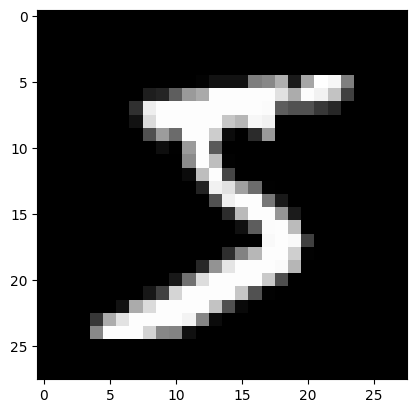

In [2]:
plt.imshow(X_train [0], cmap="gray")

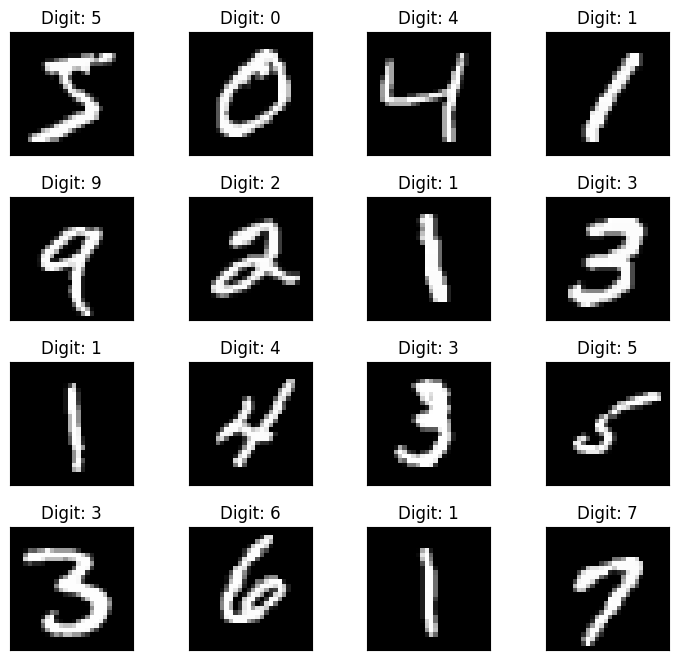

In [3]:
fig = plt.figure(figsize=(7,7))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap="gray", interpolation="none")
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])


In [4]:
# Scale the pixel intensities down to the [0,1] range by dividing them by 255.0 
# (this also converts them to floats).
X_train = X_train / 255.0
X_test  = X_test / 255.0


# **Normal CNN**

## Activation function 
- tf.keras.activations.relu
- tf.keras.activations.leaky_relu
- tf.keras.activations.sigmoid
- tf.keras.activations.softmax
- tf.keras.activations.linear
- tf.keras.activations.softplus
- tf.keras.activations.softsign
- tf.keras.activations.tanh
- tf.keras.activations.exponential
- tf.keras.activations.swish
- tf.keras.activations.gelu
- tf.keras.activations.hard_sigmoid
- tf.keras.activations.hard_silu
- tf.keras.activations.selu
- tf.keras.activations.

In [5]:
# Creating the model using the Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# The model’s summary() method displays all the model’s layers
print(model.summary())


C:\Users\Nvidia\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,160 (1.03 MB)

 Trainable params: 271,160 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

None


## Optimization
- tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07) || "Adam"
- tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False) || "RMSprop"
- tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.01) || "AdamW"
- tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) || "SGD"
- tf.keras.optimizers.Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07) || "Adagrad"
- tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07) || "Adadelta"
- tf.keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07) || "Adamax"
- tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07) || "Nadam"






## Loss Function
**Regression** 
- tf.keras.losses.MeanSquaredError() || "mse" or "mean_squared_error"
- tf.keras.losses.MeanAbsoluteError() || "mae" or "mean_absolute_error"

**Binary CLassification** 
- tf.keras.losses.BinaryCrossentropy() || "binary_crossentropy"

**Multi Classification** 
- tf.keras.losses.CategoricalCrossentropy() || "categorical_crossentropy"
- tf.keras.losses.SparseCategoricalCrossentropy() || "sparse_categorical_crossentropy"




## Metrics 
**Regression** 
- tf.keras.metrics.MeanSquaredError() || "mse" or "mean_squared_error"
- tf.keras.metrics.MeanAbsoluteError() || "mae" or "mean_absolute_error"

**Classification** 
- tf.keras.metrics.Accuracy() || "accuracy" or "acc"
- tf.keras.metrics.Precision() || "precision"
- tf.keras.metrics.Recall() || "recall"
- tf.keras.metrics.AUC() || "auc"


In [6]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", 
               metrics=["accuracy"])

## Train Model
**history = model.fit(X_train, y_train,**

**epochs=150,**

**steps_per_epoch=,**

**batch_size=64,**

**shuffle=True,**

**validation_data=(X_valid,y_valid) or validation_split=0 :1,**

**validation_batch_size=,**

**validation_steps=)**


In [7]:
# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5895 - loss: 1.4359 - val_accuracy: 0.8906 - val_loss: 0.3920
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8947 - loss: 0.3818 - val_accuracy: 0.9158 - val_loss: 0.2966
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9157 - loss: 0.3011 - val_accuracy: 0.9275 - val_loss: 0.2560
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9282 - loss: 0.2500 - val_accuracy: 0.9361 - val_loss: 0.2235
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9358 - loss: 0.2217 - val_accuracy: 0.9417 - val_loss: 0.2043
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9427 - loss: 0.2021 - val_accuracy: 0.9479 - val_loss: 0.1841
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9469 - loss: 0.1832 - val_accuracy: 0.9500 - val_loss: 0.1773
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9519 - loss: 0.1687 - val_accuracy: 0.

In [8]:
history.history

{'accuracy': [0.7590000033378601,
  0.8995416760444641,
  0.918541669845581,
  0.9280208349227905,
  0.9371458292007446,
  0.9437083601951599,
  0.948645830154419,
  0.95291668176651,
  0.9569791555404663,
  0.9605000019073486,
  0.9635000228881836,
  0.9662291407585144,
  0.9679375290870667,
  0.9709166884422302,
  0.9722708463668823,
  0.9740833044052124,
  0.9756458401679993,
  0.9768333435058594,
  0.9781458377838135,
  0.979770839214325],
 'loss': [0.911098301410675,
  0.359171062707901,
  0.2906400263309479,
  0.25090330839157104,
  0.22066855430603027,
  0.1967998594045639,
  0.17850381135940552,
  0.16306014358997345,
  0.15005996823310852,
  0.1379927694797516,
  0.1281459480524063,
  0.11938353627920151,
  0.11164863407611847,
  0.10401757806539536,
  0.09771828353404999,
  0.09228069335222244,
  0.08665990084409714,
  0.08168531954288483,
  0.07686975598335266,
  0.07283003628253937],
 'val_accuracy': [0.890583336353302,
  0.9158333539962769,
  0.9275000095367432,
  0.936083

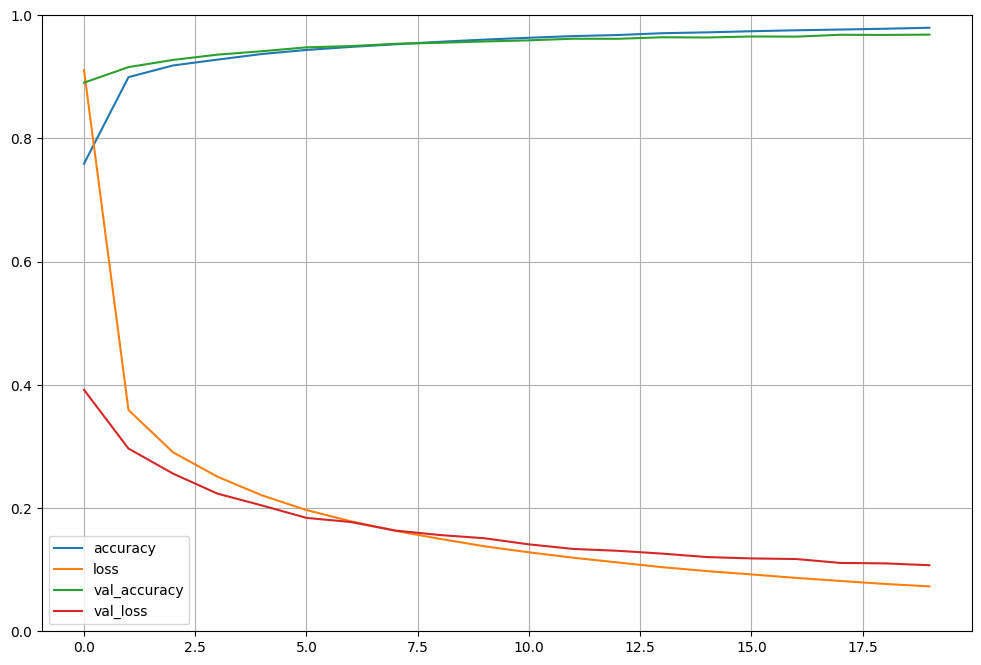

-----------------------------------------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9656 - loss: 0.1152
Loss                       :  0.09854814410209656
accuracy                   :  0.9708999991416931


In [9]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss                       : ",model_evaluate[0])
print("accuracy                   : ",model_evaluate[1])


In [10]:
y_pred = model.predict(X_test)
y_pred[0].argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


7

Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.96      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.97      0.97      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion matrix : 



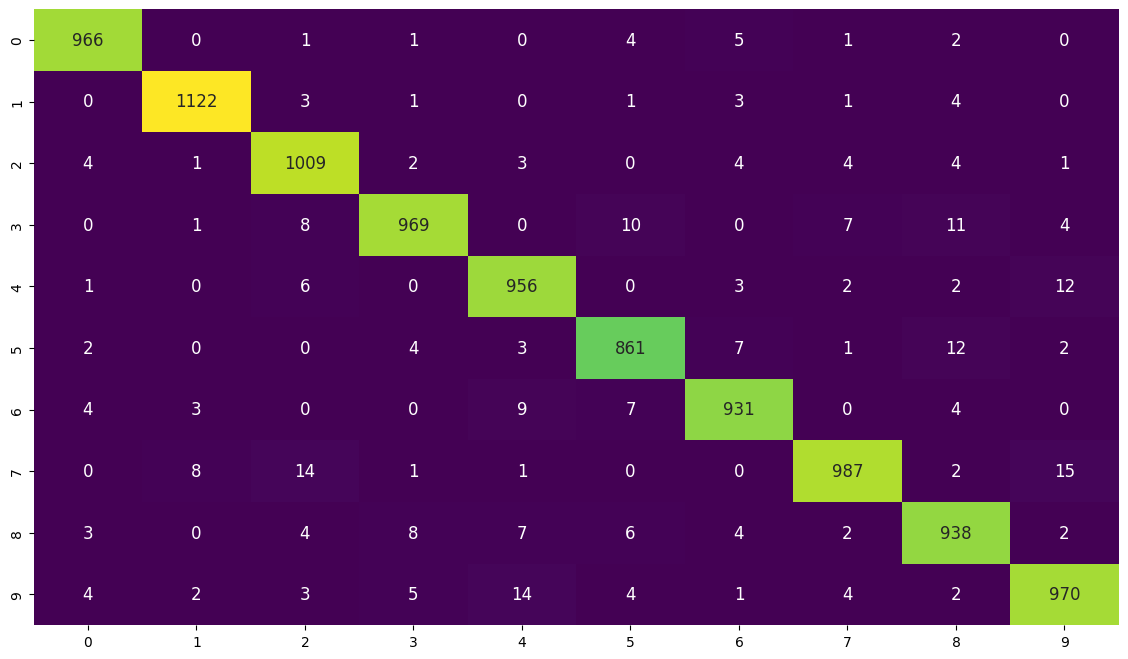

Normalized confusion matrix : 



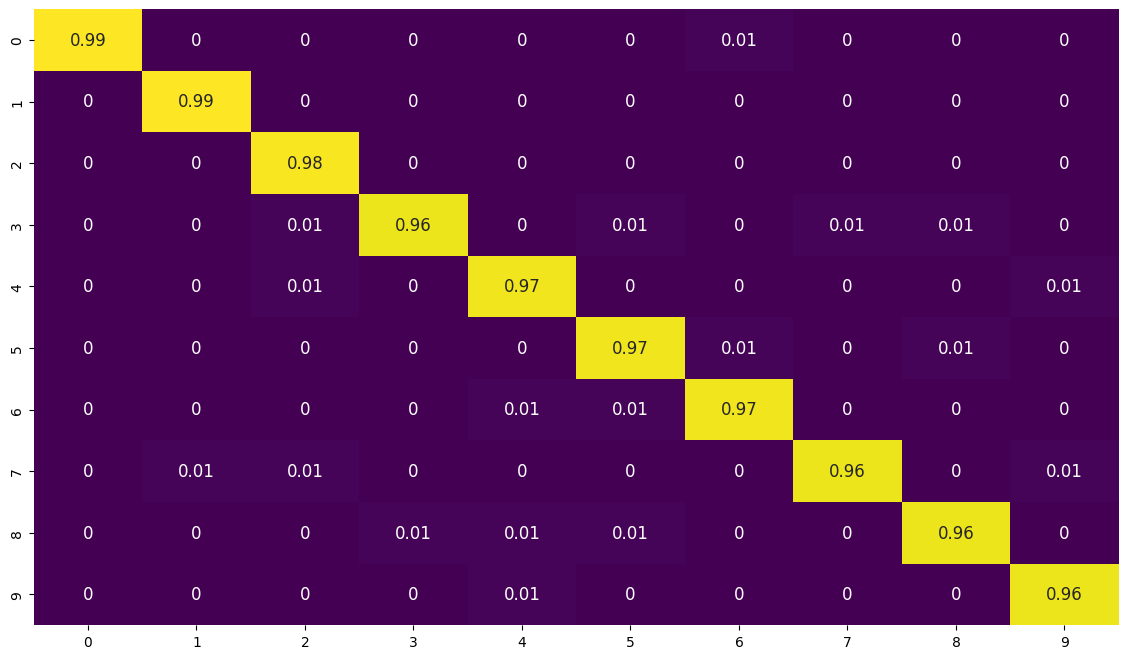

In [11]:
# Confusion Matrix

y_pred = np.argmax(y_pred, axis=-1)

class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
    conf_matx = confusion_matrix(true, preds, normalize = normalize)
    conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

    plt.subplots(figsize=(14,8))
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
    plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred, "true")
